# Introduction

This module is used to create plots (street orientation and street network) and calculate basic stats.

This module composed based on [several example notebooks](https://github.com/gboeing/osmnx-examples/tree/main/notebooks).



# 1. Import Library


In [219]:
!pip install osmnx 
!pip install matplotlib==3.1.3

import matplotlib.pyplot as plt
import numpy as np
import osmnx as ox
import networkx as nx

%matplotlib inline
weight_by_length = False

ox.__version__

  Using cached matplotlib-3.5.1-cp37-cp37m-manylinux_2_5_x86_64.manylinux1_x86_64.whl (11.2 MB)
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.1.3
    Uninstalling matplotlib-3.1.3:
      Successfully uninstalled matplotlib-3.1.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
yellowbrick 1.3.post1 requires numpy<1.20,>=1.16.0, but you have numpy 1.21.5 which is incompatible.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


/usr/local/lib/python3.7/dist-packages/google/colab/_pip.py:87: ResourceWarning: unclosed file <_io.TextIOWrapper name='/usr/local/lib/python3.7/dist-packages/matplotlib-3.5.1.dist-info/top_level.txt' mode='r' encoding='UTF-8'>
  for line in open(toplevel):


  Using cached matplotlib-3.1.3-cp37-cp37m-manylinux1_x86_64.whl (13.1 MB)
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.5.1
    Uninstalling matplotlib-3.5.1:
      Successfully uninstalled matplotlib-3.5.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
yellowbrick 1.3.post1 requires numpy<1.20,>=1.16.0, but you have numpy 1.21.5 which is incompatible.
osmnx 1.1.2 requires matplotlib>=3.4, but you have matplotlib 3.1.3 which is incompatible.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


/usr/local/lib/python3.7/dist-packages/google/colab/_pip.py:87: ResourceWarning: unclosed file <_io.TextIOWrapper name='/usr/local/lib/python3.7/dist-packages/matplotlib-3.1.3.dist-info/top_level.txt' mode='r' encoding='UTF-8'>
  for line in open(toplevel):


'1.1.2'

# 2. Class Declaration

In [233]:
class AreaObj:
  def __init__(self, place_title, north, south, east, west, network_type, figsize, tags, save_option) -> None:
    self.place_title = place_title
    self.north = north
    self.south = south
    self.east = east
    self.west = west
    self.bbox = (self.north, self.south, self.east, self.west)
    self.network_type = network_type
    self.save_option = save_option
    self.figsize = figsize
    self.tags = tags
    self.G = ox.graph_from_bbox(self.north, self.south, self.east, self.west, network_type)
    
  def bbox_map_oriient(self):
    """A funtion to plot street orientation.
    """
    # create network from that bounding box
    Gu = ox.add_edge_bearings(ox.get_undirected(self.G))
    #entropy_val = ox.bearing.orientation_entropy(Gu, num_bins=36, min_length=0, weight=None)
    fig, ax = ox.bearing.plot_orientation(Gu, title=self.place_title, area=True)

    #subtitle = f'Entropy Value = {entropy_val:.2f}'
    #fig.suptitle(subtitle, x=0.5, y=0, fontsize=12)
    
    if self.save_option:
      fname = f"/content/{place_title}_street_orientations.png"
      fig.savefig(fname, facecolor="w", dpi=100, bbox_inches="tight")
    return


  def bbox_map_node(self):
    """A function to plot street network included a red node which
    maximum betweeness centrality.
    """
    bc = nx.betweenness_centrality(ox.get_digraph(self.G), weight="length")
    max_node, max_bc = max(bc.items(), key=lambda x: x[1])
    nx.set_node_attributes(self.G, bc, "bc")

    nc = ["r" if node == max_node else "w" for node in self.G.nodes]
    ns = [80 if node == max_node else 15 for node in self.G.nodes]

    subtitle = f'Max Betweeness Centrality (Red Point) = {max_bc:.2f}'

    fname = f"/content/{place_title}_street_network.png"
    fig, ax = ox.plot_graph(self.G,
        node_color=nc,
        node_size=ns,
        node_zorder=2,
        edge_linewidth=0.2,
        edge_color="white",
        bgcolor='black',
        show=False, 
        figsize=self.figsize,
        close=False, filepath=fname)
  
    ax.set_title(self.place_title,
                 family= "DejaVu Sans",
                fontsize= 16,
                fontweight= "normal",)
    fig.suptitle(subtitle, x=0.5, y=0.15, fontsize=12)
    if self.save_option:
      fig.savefig(fname, facecolor="w", dpi=100, bbox_inches="tight")
    plt.show()
    return

  def bbox_map_node_cmap(self):
    """A function to plot street network included 
    several nodes colored by betweenness
    centrality from lowest (dark) to highest (light). 
    """
    bc = nx.betweenness_centrality(ox.get_digraph(self.G), weight="length")
    max_node, max_bc = max(bc.items(), key=lambda x: x[1])
    nx.set_node_attributes(self.G, bc, "bc")

    nc = ox.plot.get_node_colors_by_attr(self.G, "bc", cmap="viridis")

    subtitle = f'Max Betweeness Centrality (Lightest Point) = {max_bc:.2f}'

    fname = f"/content/{place_title}_street_network_cmap.png"
    fig, ax = ox.plot_graph(self.G,
        node_color=nc,
        node_size=40,
        node_zorder=2,
        edge_linewidth=1.2,
        edge_color="#696969",
        bgcolor='white',
        show=False, 
        close=False, 
        figsize=self.figsize,
        filepath=fname)

    ax.set_title(self.place_title,
                 family= "DejaVu Sans",
                fontsize= 16,
                fontweight= "normal",)
    fig.suptitle(subtitle, x=0.5, y=0.15, fontsize=12)
    if self.save_option:
      fig.savefig(fname, facecolor="w", dpi=100, bbox_inches="tight")
    plt.show()
    return

  def bbox_basic_stats(self):
    """A function to calculate basic statistic.
    """

    stats = ox.basic_stats(self.G)
    # unpack dicts into individiual keys:values
    for k, count in stats["streets_per_node_counts"].items():
        stats["{}way_int_count".format(k)] = count
    for k, proportion in stats["streets_per_node_proportions"].items():
        stats["{}way_int_prop".format(k)] = proportion

    # delete the no longer needed dict elements
    del stats["streets_per_node_counts"]
    del stats["streets_per_node_proportions"]

    # load as a pandas dataframe
    self.stats = pd.DataFrame(pd.Series(stats, name="value")).round(3).reset_index()
    self.ext_stats   = pd.DataFrame(ox.extended_stats(self.G, connectivity=True,bc=True))
    #self.stats = self.stats.rename(columns={''})
    return self
  
  def bbox_gdf(self):
    """A function to plot footprints
    """
    gdf = ox.geometries.geometries_from_bbox(self.north, self.south, self.east, self.west, tags=self.tags)
    fname = f"/content/{place_title}_footprints.png"
    fig, ax = ox.plot.plot_footprints(gdf, 
                                      figsize = self.figsize,
                                      bbox=self.bbox,
                                      alpha=0.7,
                                      color='#873e23',
                                      bgcolor='#eeeee4',
                                      save=self.save_option,
                                      filepath=fname)
    return

# 3. Object Declaration

In [234]:
#the points are writed in (lattitude, longitude) format
north_point = (-7.75551, 110.37545)
south_point = (-7.76265, 110.37442)
east_point = (-7.75919, 110.37897)
west_point = (-7.75787, 110.36992)
figsize = (10,6)

north = north_point[0]
south = south_point[0]
east  = east_point[1]
west  = west_point[1]
place_title = 'Pogung'
network_type='bike'
tags ={'building': True}
save_option=True
pogung = AreaObj(place_title, north, south, east, west, network_type, figsize, tags, save_option)

# 4. Plot Street Orientation

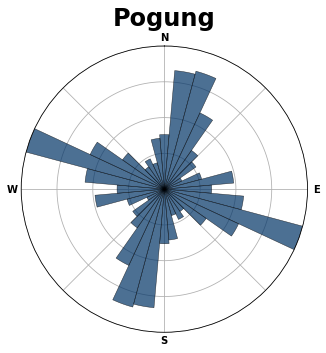

In [218]:
pogung.bbox_map_orient()

# 5. Plot Street Network

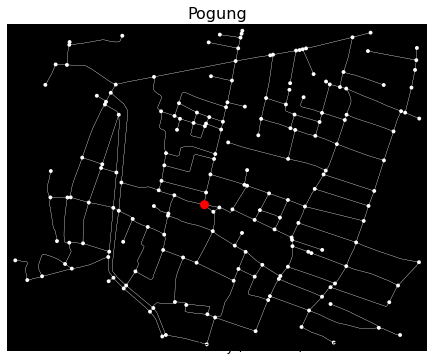

In [194]:
pogung.bbox_map_node()

# 6. Plot Street Network (CMAP Color)

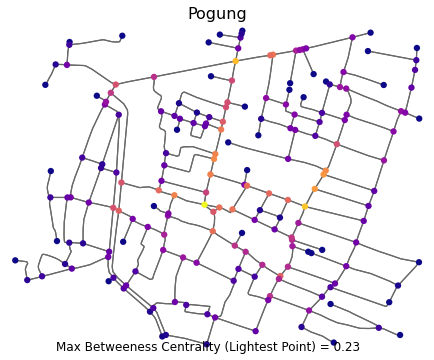

In [203]:
pogung.bbox_map_node_cmap()

# 7. Plot Footprints

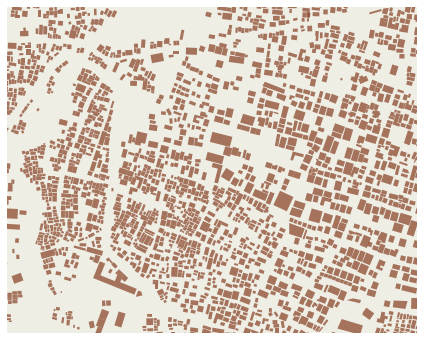

In [196]:
pogung.bbox_gdf()

# 8. Show Basic Stats

In [235]:
pogung.bbox_basic_stats().stats

/usr/local/lib/python3.7/dist-packages/osmnx/stats.py:458: UserWarning: The extended_stats function has been deprecated and will be removed in a future release. Use NetworkX directly for extended topological measures.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/networkx/algorithms/link_analysis/pagerank_alg.py:108: DeprecationWarning: networkx.pagerank_scipy is deprecated and will be removed in NetworkX 3.0, use networkx.pagerank instead.
  G, alpha, personalization, max_iter, tol, nstart, weight, dangling


,index,value
0,n,190.000
1,m,500.000
2,k_avg,5.263
3,edge_length_total,30425.560
4,edge_length_avg,60.851
5,streets_per_node_avg,2.847
6,intersection_count,162.000
7,street_length_total,15212.780
8,street_segment_count,250.000
9,street_length_avg,60.851


# 9. Show Extended Stats

In [244]:
bc_avg = pogung.ext_stats['betweenness_centrality_avg'].mean()
print(f'Average betweeness centrality: {bc_avg*100:.2f}%')
pogung.ext_stats

Average betweeness centrality: 5.45%


,avg_neighbor_degree,avg_neighbor_degree_avg,avg_weighted_neighbor_degree,avg_weighted_neighbor_degree_avg,degree_centrality,degree_centrality_avg,clustering_coefficient,clustering_coefficient_avg,clustering_coefficient_weighted,clustering_coefficient_weighted_avg,pagerank,pagerank_max_node,pagerank_max,pagerank_min_node,pagerank_min,node_connectivity,edge_connectivity,betweenness_centrality,betweenness_centrality_avg
1388840001,3.000000,2.903509,0.035956,0.061795,0.031746,0.027847,0.0,0.009649,0.0,0.001735,0.007167,2282865325,0.011111,2548201181,0.001018,1,1,0.125239,0.05451
1388845993,3.000000,2.903509,0.047122,0.061795,0.031746,0.027847,0.0,0.009649,0.0,0.001735,0.004853,2282865325,0.011111,2548201181,0.001018,1,1,0.060678,0.05451
1388845998,3.250000,2.903509,0.043764,0.061795,0.042328,0.027847,0.0,0.009649,0.0,0.001735,0.007193,2282865325,0.011111,2548201181,0.001018,1,1,0.050490,0.05451
1388846002,3.000000,2.903509,0.030659,0.061795,0.031746,0.027847,0.0,0.009649,0.0,0.001735,0.007116,2282865325,0.011111,2548201181,0.001018,1,1,0.025498,0.05451
1388846010,3.333333,2.903509,0.064597,0.061795,0.031746,0.027847,0.0,0.009649,0.0,0.001735,0.004020,2282865325,0.011111,2548201181,0.001018,1,1,0.051221,0.05451
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8568609523,3.000000,2.903509,0.019841,0.061795,0.010582,0.027847,0.0,0.009649,0.0,0.001735,0.004196,2282865325,0.011111,2548201181,0.001018,1,1,0.000000,0.05451
9150752156,3.000000,2.903509,0.082479,0.061795,0.010582,0.027847,0.0,0.009649,0.0,0.001735,0.002066,2282865325,0.011111,2548201181,0.001018,1,1,0.000000,0.05451
9192612967,3.000000,2.903509,0.068711,0.061795,0.010582,0.027847,0.0,0.009649,0.0,0.001735,0.002590,2282865325,0.011111,2548201181,0.001018,1,1,0.000000,0.05451
9209840167,2.333333,2.903509,0.066712,0.061795,0.031746,0.027847,0.0,0.009649,0.0,0.001735,0.004822,2282865325,0.011111,2548201181,0.001018,1,1,0.030001,0.05451
